Рекомендательные системы в современном мире являются одним из популярнейших приложений машинного обучения и статистических методов. Зайдя на сайт продавца мебели и посмотрев пару вариантов, контекстная реклама из всех углов вам еще пару дней будет надоедать баннерами с диванами и стульями.

Наиболее приятный результат работы рекомендательных систем мы можем видеть на ютубе и различных онлайн-кинотеатрах -
нам пытаются показать тот контент, который интересует непосредственно нас. Не очень приятный результат мы видим в приложениях
типа Сбербанк Онлайна, который нам пытается втюхать очередной кредит по "выгодной" ставке.

На данном занятии мы рассмотрим некоторые популярные (в прошлом и иногда в настоящем) алгоритмы рекомендательных систем.



# Коллаборативная фильтрация

Допустим, у нас есть матрица оценок пользователей различным фильмам. Наша задача в данном случае - на основании
исторических оценок юзеров определенных фильмов порекомендовать какому-то конкретному юзеру посмотреть фильм,
который он бы с наибольшим желанием увидел (при том, что уже мог что-то у нас посмотреть, а мог и не посмотреть).

Рассмотрим основные методы коллаборативной фильтрации. Допустим, что у нас есть айтем (например, фильм)
и рейтинг (например, оценка фильма).

## Memory-based коллаборативная фильтрация

Данный вид фильтрации не требует настройки никаких гиперпараметров и использует только исторические данные о
поведении пользователей.

1. **User-item** фильтрация берет определенного пользователя, ищет наиболее похожих на него пользователей
(например, при помощи косинусного расстояния) и, исходя из информации о рейтинге рекомендует нужный айтем,
который был в среднем чаще выбран этими похожими пользователями.

2. **Item-item** фильтрация берет определенный айтем, ищет пользователей с наибольшей оценкой этого айтема
и ищет другие айтемы, к которым в среднем были лояльны эти пользователи.

**User-Item** коллаборативная фильтрация: юзерам, которые похожи на определенного юзера, также нравится...

**Item-Item** коллаборативная фильтрация: юзерам, которым нравится этот айтем, также нравится...


Примерный алгоритм **user-item** коллаборативной фильтрации выглядит следующим образом.

1. Выбрать L пользователей, вкусы которых больше всего похожи на вкусы рассматриваемого юзера.
Для этого для каждого из пользователей нужно вычислить выбранную меру (в нашем случае косинусную, подробней ниже)
в отношении рассматриваемого пользователя, и выбрать L наибольших.

2. Для каждого из пользователей умножить его оценки на вычисленное значение этой меры.
Таким образом оценки более «похожих» пользователей будут сильнее влиять на итоговую рекомендацию.

3. Для каждого из айтемов посчитать сумму калиброванных оценок L наиболее близких пользователей,
полученную сумму разделить на сумму мер L выбранных пользователей.

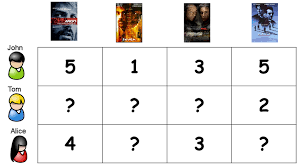

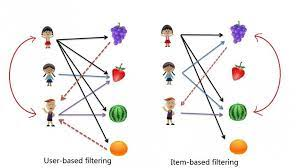


Косинусная мера близости вычисляется следующим образом:

$ \Large CosineSimilarity(u, u') = s(u, u') = \frac{r_u r_u'} {||r_u|| \ ||r_u'||} = \sum_i \frac{r_{ui} r_{u'i}} {\sqrt{\sum_i r^2_{ui}}
\sqrt{\sum_i r^2_{u'i}} } $

Вообще говоря, вместо косинусной меры мы можем использовать и корреляцию Пирсона (для центрированых переменных эти
величины одинаковы!).

По аналогии с методом ближайших соседей, находим средневзвешенную по "соседям" метрику,
которая будет прогнозировать оценку для пользователя $u$ айтему $i$:

$\Large \hat{r_{ui}} = \frac{  \sum_{u'} s(u, u') r_{u'i} }
{ \sum_{u'}|s(u, u')| }$

$r_{ui}$ - рейтинг от пользователя $u$ айтему $i$, $u'$ - все соседи юзера

По факту мы умножаем схожесть юзера $u$ с юзером $u'$ на оценку юзера $u'$ айтему $i$.

Проблемы такой формулы: числитель может быть отрицательным (например, пользователь непохож на остальных и
ближайшие к нему - это наименее дальние соседи). Возможные решения:

- Выкинуть отрицательные схожести (теряем информацию)

- Заменяем ближайшие отрицательные на ближайшие неотрицательные прогнозы.

- Стандартизируем рейтинги для каждого юзера и добавляем в числителе функцию знака:

$\Large \hat{r_{ui}} = \frac{  \sum_{u'} s(u, u') sign[s(u, u')] r_{u'i} }
{ \sum_{u'}|s(u, u')| }$. Не забудем к полученному прогнозу прибавить стандартное отклонение и среднее, чтобы получить
исходную шкалу рейтингов.

Следующий напрашивающийся вопрос: а сколько ближайших соседей вообще брать? Обычно предлагают такие решения:

- k=10, 20, 30.... (подбираем как гиперпараметр)

- по порогу схожести (возможно для каких-то пользователей ничего не найдем)

- все (вычислительно затратно)

Основные проблемы **user-based** подхода:

- небольшое количество рейтингов для определенных пользователей

- похожести могут сильно измениться при добавлении новых данных

- мало пересечений для двух случайных пользователей


Проблемы, описанные выше, частично можно решить в **item-based** подходе. В этом случае мы ищем похожие друг на друга
айтемы и рекомендуем пользователю айтем, который похож на те, что уже юзер оценивал. Однако, здесь есть проблема:
одинаковое распределение оценок разных айтемов может привести к тому, что наш алгоритм выдаст нам их как похожие.
Например, юзеры могут ставить одинаковые оценки разным фильмам и нам алгоритм скажет, что эти фильмы идеально похоже
друг с другом, хотя они могут быть вообще разными.
Поэтому в этом случае мы используем модернизированную косинусную меру:

$
\Large Adjusted CosineSimilarity(i, i') = s(i, i') = \sum_i \frac{(r_{ui} - \bar{r_u}) (r_{ui'} - \bar{r_u})}
{
\sqrt{(\sum_i r_{ui} - \bar{r_u})^2}
\sqrt{(\sum_i r_{ui'} - \bar{r_u})^2}
}
$

Плюсы **item-item** фильтрации:

- реже обновляем схожести (так как item добавляются реже, чем юзеры)

- более надежная оценка похожестей (больше наблюдений)

Резюме по алгоритмам коллаборативной фильтрации:

- Неплохие рекомендации при большом количестве доступных данных

- Плохо работает на сильно разреженных данных

- Смотрим оценки только по пересечениям айтемов - никак не учитываем то, что юзеры могут оценивать похожие айтемы

Давайте попробуем порекомендовать фильмы различным пользователем на примере датасета MovieLens при помощи алгоритмов
коллаборативной фильтрации.

In [68]:
import zipfile
from collections import defaultdict
import datetime
import scipy.sparse as sps
import numpy as np

# Скачаем данные https://grouplens.org/datasets/movielens/
import os
os.chdir("/Users/iakubovskii/Machine_Learning/RANEPA/Fintech_2020/Машинное обучение/Данные/")
# Импортируем данные
movies, users, ratings = {}, {}, defaultdict(list)
with zipfile.ZipFile("ml-1m.zip", "r") as z:
    with z.open("ml-1m/movies.dat") as m:
        for line in m:
            MovieID, Title, Genres = line.decode("iso-8859-1").strip().split("::")
            MovieID = int(MovieID)
            Genres = Genres.split('|')
            movies[MovieID] = {"Title": Title, 'Genres': Genres}

    with z.open("ml-1m/users.dat") as m:
        fields = ['UserID', "Gender", "Age", "Occupation", "Zip-code"]
        for line in m:
            row = list(zip(fields, line.decode("iso-8859-1").strip().split("::")))
            data = dict(row[1:])
            data['Occupation'] = int(data['Occupation'])
            users[int(row[0][1])] = data

    with z.open("ml-1m/ratings.dat") as m:
        for line in m:
            UserID, MovieID, Rating, Timestamp = line.decode("iso-8859-1").strip().split("::")
            UserID = int(UserID)
            MovieID = int(MovieID)
            Rating = int(Rating)
            Timestamp = int(Timestamp)
            ratings[UserID].append((MovieID, Rating, datetime.datetime.fromtimestamp(Timestamp)))



In [71]:
print(users[2])
print(ratings[2])

{'Gender': 'M', 'Age': '56', 'Occupation': 16, 'Zip-code': '70072'}
[(1357, 5, datetime.datetime(2001, 1, 1, 0, 38, 29)), (3068, 4, datetime.datetime(2001, 1, 1, 0, 43, 20)), (1537, 4, datetime.datetime(2001, 1, 1, 0, 53, 40)), (647, 3, datetime.datetime(2001, 1, 1, 0, 49, 11)), (2194, 4, datetime.datetime(2001, 1, 1, 0, 48, 17)), (648, 4, datetime.datetime(2001, 1, 1, 0, 58, 33)), (2268, 5, datetime.datetime(2001, 1, 1, 0, 48, 17)), (2628, 3, datetime.datetime(2001, 1, 1, 1, 0, 51)), (1103, 3, datetime.datetime(2001, 1, 1, 0, 41, 45)), (2916, 3, datetime.datetime(2001, 1, 1, 0, 56, 49)), (3468, 5, datetime.datetime(2001, 1, 1, 0, 35, 42)), (1210, 4, datetime.datetime(2001, 1, 1, 0, 29, 11)), (1792, 3, datetime.datetime(2001, 1, 1, 0, 59, 1)), (1687, 3, datetime.datetime(2001, 1, 1, 1, 2, 54)), (1213, 2, datetime.datetime(2001, 1, 1, 0, 34, 18)), (3578, 5, datetime.datetime(2001, 1, 1, 0, 42, 38)), (2881, 3, datetime.datetime(2001, 1, 1, 1, 0, 2)), (3030, 4, datetime.datetime(2001, 1, 

In [73]:
# Поделим выборку на тренировочную и тестовую (80% к 20%)
times = []
for user_ratings in ratings.values():
    times.extend(x[2] for x in user_ratings)
times = sorted(times)
threshold_time = times[int(0.8 * len(times))]

train, test = [], []
# Делим все рейтинги на 5, чтобы привести к шкале от 0 до 1 (min-max scaler)
for user_id, user_ratings in ratings.items():
    train.extend((user_id, rating[0], rating[1] / 5.0) for rating in user_ratings if rating[2] <= threshold_time)
    test.extend((user_id, rating[0], rating[1] / 5.0) for rating in user_ratings if rating[2] > threshold_time)

Теперь начинаем считать похожести наших фильмов. Для начала найдем средний рейтинг
каждого юзера.

In [75]:
user_average = defaultdict(list)
for u, i, r in train:
    user_average[u].append(r)
for u in user_average.keys():
    user_average[u] = np.sum(user_average[u]) / len(user_average[u])
user_average = dict(user_average)

In [82]:
# Теперь центрируем и нормируем.
item_norms = defaultdict(float)
for u, i, r in train:
    item_norms[i] += (r - user_average[u])**2
for i in item_norms.keys():
    item_norms[i] = np.sqrt(item_norms[i])
item_norms = dict(item_norms)

In [90]:
# Посчитаем обновленную матрицу рейтингов, где вычтем среднее и поделим на норму вектора
item_user = sps.csc_matrix(
    ([(r - user_average[u]) / (item_norms[i] + 1e-06) for u, i, r in train],
    ([e[1] for e in train], [e[0] for e in train]))
)
# Наконец-то мы готовы посчитать похожести фильмов
item_item_similarity = item_user @ item_user.T

In [92]:
# Обулим отрицательные похожести
item_item_similarity[item_item_similarity < 0] = 0

In [115]:
# Теперь построим рекомендацию для рандомного пользователя
train_by_user, test_by_user = defaultdict(list), defaultdict(list)
for u, i, r in train:
    train_by_user[u].append((i, r))
for u, i, r in test:
    test_by_user[u].append((i, r))

user_id = 6040
user_ratings = train_by_user[user_id]

user_rated_items = [e[0] for e in user_ratings]
user_rated_ratings = sps.csr_matrix([[e[1]] for e in user_ratings])

# Найдем столбцы в матрице похожести, которые соответствуют оцененным фильмам
similar_items = item_item_similarity[:, user_rated_items]

# Теперь эти похожести перемножим с рейтингами данного юзера и получим предсказания
recoms = similar_items.dot(user_rated_ratings) / (similar_items.sum(axis=1) + 1e-06)

In [117]:
recoms

matrix([[0.        ],
        [0.74819368],
        [0.40285119],
        ...,
        [0.79236067],
        [0.76070987],
        [0.75454628]])

In [121]:
# Сравним с рейтигами на тесте и сравним с нашими предсказаниями

test_user_ratings = test_by_user[user_id]
test_user_rated_items = [e[0] for e in test_user_ratings]
test_user_rated_ratings = np.array([[e[1]] for e in test_user_ratings])
print(np.array(recoms[test_user_rated_items, :])[:, 0])
print(test_user_rated_ratings)

[0.81907084 0.77952099 0.7431567  0.78205121 0.8146596  0.75421669
 0.82053979 0.79268059 0.77863912 0.78497366 0.80319477 0.82919131
 0.79921779 0.77875818 0.72230169 0.78808294 0.75104579 0.76944995
 0.78971198 0.79084428 0.71691417 0.75438915 0.74879743]
[[0.8]
 [1. ]
 [0.6]
 [1. ]
 [1. ]
 [0.8]
 [0.8]
 [0.8]
 [0.8]
 [0.8]
 [1. ]
 [1. ]
 [0.8]
 [0.8]
 [0.6]
 [0.8]
 [0.8]
 [0.8]
 [0.8]
 [0.8]
 [0.6]
 [0.8]
 [0.6]]


In [124]:
# Вычислим RMSE для наших прогнозов
mse, COUNT = 0, 0
for user, ratings in train_by_user.items():
    user_rated_items = [e[0] for e in ratings]
    user_rated_ratings = sps.csr_matrix([[e[1]] for e in ratings])
    similar_items = item_item_similarity[:, user_rated_items]
    recoms = similar_items.dot(user_rated_ratings) / (similar_items.sum(axis=1) + 1e-6)
    tbu = test_by_user[user]
    test_items = [e[0] for e in tbu]
    test_ratings = np.array([[e[1]] for e in tbu])
    errors = np.square(recoms[test_items, :] - test_ratings)
    mse += sum(errors)
    COUNT += len(errors)

print(mse / COUNT)

[[0.03749982]]


## Matrix-based коллаборативная фильтрация - матричная факторизация

### TruncatedSVD

Данный метод основан на изученном на прошлом занятии методе SVD - разложения матриц. Применительно к рекомендательным
системам мы хотим разложить нашу матрицу айтем-юзер на скрытые состояния. Вспомним еще раз SVD-разложение:

$$ M = U \Sigma V^T$$

Здесь первые $k$ векторов матрицы $U$ будут описывать профили юзеров, сингулярные значения из $\Sigma$ - важность факторов,
а матрица $V^T$ - профили айтемов. Давайте применим SVD разложение к нашей матрице фильмов и юзеров.



In [174]:
import pandas as pd
from scipy.sparse.linalg import svds
u, s, vt = svds(item_user, k=10)

In [161]:
# u - матрица профилей айтемов, vt - матрица профилей юзеров
item_profile_svd = pd.Series({key: value['Title'] for key, value in movies.items()}).to_frame("title").join(
    pd.DataFrame(u[:, 9]))
print(item_profile_svd.set_index("title").nlargest(columns=[0], n=10))
print(item_profile_svd.set_index("title").nsmallest(columns=[0], n=10))

                                                           0
title                                                       
Raiders of the Lost Ark (1981)                      0.055620
Godfather, The (1972)                               0.053880
Star Wars: Episode V - The Empire Strikes Back ...  0.052231
Star Wars: Episode IV - A New Hope (1977)           0.052109
Usual Suspects, The (1995)                          0.050224
Silence of the Lambs, The (1991)                    0.047043
Psycho (1960)                                       0.046999
Godfather: Part II, The (1974)                      0.046961
Dr. Strangelove or: How I Learned to Stop Worry...  0.046849
Shawshank Redemption, The (1994)                    0.046521
                                                    0
title                                                
Superman III (1983)                         -0.052563
Superman IV: The Quest for Peace (1987)     -0.049724
Howard the Duck (1986)                      -0.04799

In [162]:
item_profile_svd = pd.Series({key: value['Title'] for key, value in movies.items()}).to_frame("title").join(
    pd.DataFrame(u[:, 8]))
print(item_profile_svd.set_index("title").nlargest(columns=[0], n=10))
print(item_profile_svd.set_index("title").nsmallest(columns=[0], n=10))


                                        0
title                                    
Sleepover (1995)                 0.126654
Shadows (Cienie) (1988)          0.126654
Terror in a Texas Town (1958)    0.126654
McCullochs, The (1975)           0.126654
Anatomy (Anatomie) (2000)        0.126654
Circus (2000)                    0.126654
Scorta, La (1993)                0.126653
Happy Weekend (1996)             0.126653
Lay of the Land, The (1997)      0.126653
Ménage (Tenue de soirée) (1986)  0.126653
                                                           0
title                                                       
Foolish (1999)                                     -0.126652
Tainted (1998)                                     -0.126652
Resurrection Man (1998)                            -0.126652
Born to Win (1971)                                 -0.126652
Wooden Man's Bride, The (Wu Kui) (1994)            -0.126652
Went to Coney Island on a Mission From God... B... -0.094033
Chushing

In [163]:
item_profile_svd = pd.Series({key: value['Title'] for key, value in movies.items()}).to_frame("title").join(
    pd.DataFrame(u[:, 7]))
print(item_profile_svd.set_index("title").nlargest(columns=[0], n=10))
print(item_profile_svd.set_index("title").nsmallest(columns=[0], n=10))

                                                0
title                                            
Low Life, The (1994)                     0.160180
Hurricane Streets (1998)                 0.147782
Go Now (1995)                            0.137563
Grandfather, The (El Abuelo) (1998)      0.124125
Journey of August King, The (1995)       0.120158
Tarantella (1995)                        0.118874
Miss Julie (1999)                        0.110993
Venice/Venice (1992)                     0.110492
Digging to China (1998)                  0.098337
Crime and Punishment in Suburbia (2000)  0.095687
                                                           0
title                                                       
Jar, The (Khomreh) (1992)                          -0.160179
I Stand Alone (Seul contre tous) (1998)            -0.145778
Nénette et Boni (1996)                             -0.141265
JLG/JLG - autoportrait de décembre (1994)          -0.140547
Tigrero: A Film That Was Never Mad

Давайте попробуем порекомендовать фильмы при помощи данного метода.

In [191]:
# Давайте испортируем те же самые данные другим способом.
with zipfile.ZipFile("ml-1m.zip", "r") as z:
    data = pd.io.parsers.read_csv(z.open('ml-1m/ratings.dat'),
        names=['user_id', 'movie_id', 'rating', 'time'],
        engine='python', delimiter='::',
                                  encoding = "ISO-8859-1")
    movie_data = pd.io.parsers.read_csv(z.open('ml-1m/movies.dat'),
        names=['movie_id', 'title', 'genre'],
        engine='python', delimiter='::',
                                   encoding = "ISO-8859-1" )

In [194]:
ratings_mat = np.ndarray(
    shape=(np.max(data.movie_id.values), np.max(data.user_id.values)),
    dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

In [195]:
# Применим SVD разложение
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [197]:
def top_cosine_similarity(data, movie_id, top_n=10):
    '''Функция вычисляет косинусную похожесть '''
    index = movie_id - 1 # Movie id starts from 1
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

def print_similar_movies(movie_data, movie_id, top_indexes):
    '''Функция выдает рекомендацию из похожих фильмов'''
    print('Рекомендация для {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

# Выберем 50 главных компонент для описания свойств фильма
k = 50
movie_id = 1 # Спрогнозируем похожие фильмы для первого
top_n = 10 # Первые топ-10

sliced = V.T[:, :k]
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Рекомендация для Toy Story (1995): 

Toy Story (1995)
Toy Story 2 (1999)
Babe (1995)
Bug's Life, A (1998)
Pleasantville (1998)
Babe: Pig in the City (1998)
Aladdin (1992)
Stuart Little (1999)
Secret Garden, The (1993)
Tarzan (1999)


<ipython-input-197-4259aaeb7c85>:6: RuntimeWarning: invalid value encountered in true_divide
  similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)


Отметим, что проблема данного подхода заключается в том, что разложение матрицы требует наличия всех значений.
Однако, в нашем случае (да и не только нашем), матрицы рейтингов получаются довольно разреженными. В этом случае полученное
SVD разложение будет иметь много шума в результатах. У нас, к примеру, разложение применилось к матрице с нулями,
где предполагалось, что вместо пропусков - нули.

К счастью, хорошие люди нашли выход и из этой ситуации. Во время соревнований от Netflix, был разработан алгоритм,
который позволяет восстанавливать пропущенные значения нашей матрицы рейтингов. В его основе заложена идея предсказания
рейтинга следующим образом:

$\hat{r_{ui}} = \mu + b_u + b_i + q_i^T p_u$,
где

- $\mu$ - глобальное среднее

- $b_u$ - инвидиуальный коэффициент юзера (оптимизм)

- $b_i$ - индивидуальный коэффициент товара (качество)

- $q_i$ - профиль товара (вектор длины $k$)

- $p_u$ - профиль юзера (вектор длины $k$)

Необходимы параметры будем получать из условия оптимизации:

$$\sum_{(u,i) \in R} (\hat{r_{ui}} -  \mu + b_u + b_i + q_i^T p_u)^2 + \lambda(b_u^2 + b_i^2 + ||q_i||^2 + ||p_u||^2$$

Решается она при помощи метода SGD - стохастического градиентного спуска.

### Явный и неявный рейтинг

До сих пор мы вели речь о явных рейтингах - оценка фильма, которую пользователь оставил. Однако, в природе существуют еще
и неявные способы, которыми юзер может сообщить нам о своем отношении к тому или иному айтему. Например, юзер мог прочитать
статью. Однако, явно мог нам не сообщить - понравилась она ему или нет. Соответственно, мы не можем знать на 100%,
насколько данная статья нравится пользователю. В конце данного занятия рассмотрим наиболее популярный в последнее
время алгоритм матричной факторизации, который успешно себя зарекомендовал в trade-off между скоростью работы и
результативностью.

### ALS (alternative least squares) для явного рейтинга

Идея такая же, что и в случае SVD: мы хотим найти такие вектора профилей для айтемов и юзеров, которые наиболее верно
характеризуют выставленные рейтинги. Будем минимизировать такой функционал:

$$ \sum_{u,i}(r_{ui} - q_i^Tp_u)^2 + \lambda (||q_i||^2 + ||p_u||^2) $$

Кратное описание алгоритма:

- Иницилизируем $P$, $Q$ случайными значениями

- Далее запускаем цикл, где фиксируем попеременно то матрицу $Q$, то матрицу $P$ и каждый раз пересчитываем значения
исходных матриц

### ALS (alternative least squares) для неявного рейтинга

В случае неявного рейтинга все чуточку сложнее. Теперь мы вводим параметр $\rho_{ui} \in \{1,0\}$ и уверенность
$c_{ui} = 1 + \alpha r_{ui}$

В случае неявных оценок мы будем минимизировать такой функционал:

$$ \sum_{u,i} c_{ui} (\rho_{ui} - q_i^Tp_u)^2 + \lambda (\sum_u||q_i||^2 + \sum_i||p_u||^2) $$

Алгоритм в этом случае такой же как и для явных оценок.

In [224]:
# Давайте применим готовую реализацию на данных LastFM
import pandas as pd
import numpy as np
import scipy.sparse as sparse

import implicit
os.chdir("/Users/iakubovskii/Machine_Learning/Datasets/")
raw_data = pd.read_table('lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv')
raw_data = raw_data.drop(raw_data.columns[1], axis=1)
raw_data.columns = ['user', 'artist', 'plays']

data = raw_data.dropna()
data = data.copy()

data['user'] = data['user'].astype("category")
data['artist'] = data['artist'].astype("category")
data['user_id'] = data['user'].cat.codes
data['artist_id'] = data['artist'].cat.codes

sparse_item_user = sparse.csr_matrix((data['plays'].astype(float),
                                      (data['artist_id'], data['user_id'])))
sparse_user_item = sparse.csr_matrix((data['plays'].astype(float),
                                      (data['user_id'], data['artist_id'])))

# Инициализируем модель
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)

# Считаем уверенность,умножая альфу значения
alpha_val = 15
data_conf = (sparse_item_user * alpha_val).astype('float')

# Обучаем модель
model.fit(data_conf)

# Находим 10 наиболее подходящих композиций на Jay-Z
item_id = 147068 #Jay-Z
n_similar = 10
similar = model.similar_items(item_id, n_similar)
for item in similar:
    idx, score = item
    print(data.artist.loc[data.artist_id == idx].iloc[0])


# Создаем рекомендацию для юзера с id 2025
user_id = 2025
recommended = model.recommend(user_id, sparse_user_item)

artists = []
scores = []

# Вытаскиваем имя исполнителя
for item in recommended:
    idx, score = item
    artists.append(data.artist.loc[data.artist_id == idx].iloc[0])
    scores.append(score)
recommendations = pd.DataFrame({'artist': artists, 'score': scores})

print(recommendations)

  0%|          | 0/20 [00:00<?, ?it/s]

jay-z
outkast
snoop dogg
2pac
lupe fiasco
the roots
the streets
atmosphere
50 cent
m.i.a.
                             artist     score
0            sly & the family stone  1.122982
1                      brian wilson  1.111815
2                         sam cooke  1.105208
3  elvis costello & the attractions  1.096961
4                        funkadelic  1.090695
5                     the beta band  1.086622
6                          the band  1.084952
7                       silver jews  1.083615
8                      randy newman  1.082963
9                 drive-by truckers  1.082437


In [227]:
raw_data.head()

,user,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
1,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
2,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
3,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
4,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
